In [60]:
from standardInclude import *
from fit_util import *

In [104]:
f2 = r.TFile("./data/gm2offline_full_run2.root")
#f3 = r.TFile("./data/gm2offline_full_run3.root")
#f3 = r.TFile("./data/gm2offline_full_run3_allBeamTemplates.root")
#f3 = r.TFile("./data/gm2offline_full_run3_allLaserTemplates.root")
f3 = r.TFile("./data/gm2offline_full_run3_hardCodedBools.root")
#f3 = r.TFile("./data/gm2offline_full_run3_tfFlip.root")

In [105]:
t2 = f2.Get("nearlineHistTree").Get("eventTree")
t3 = f3.Get("nearlineHistTree").Get("eventTree")
t3.SetLineColor(2)

In [106]:
f3.cd("nearlineHistTree")
f3.ls()

TFile**		./data/gm2offline_full_run3_hardCodedBools.root	
 TFile*		./data/gm2offline_full_run3_hardCodedBools.root	
  TDirectoryFile*		nearlineHistTree	nearlineHistTree (CaloNearlineHistograms) folder
   OBJ: TTree	eventTree	eventTree : 0 at: 0x7fffea9496d0
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectoryFile	calo7;1	calo7
   KEY: TDirectoryFile	calo8;1	calo8
   KEY: TDirectoryFile	calo9;1	calo9
   KEY: TDirectoryFile	calo10;1	calo10
   KEY: TDirectoryFile	calo11;1	calo11
   KEY: TDirectoryFile	calo12;1	calo12
   KEY: TDirectoryFile	calo13;1	calo13
   KEY: TDirectoryFile	calo14;1	calo14
   KEY: TDirectoryFile	calo15;1	calo15
   KEY: TDirectoryFile	calo16;1	calo16
   KEY: TDirectoryFile	calo17;1	calo17
   KEY: TDirectoryFile	calo18;1	calo18
   KEY: TDirectoryFile	calo19;1	calo19
   KEY: TDirectoryF

---

### Make sure we're looking at the correct run/subrun

270940100.0 270940100.0 0.0


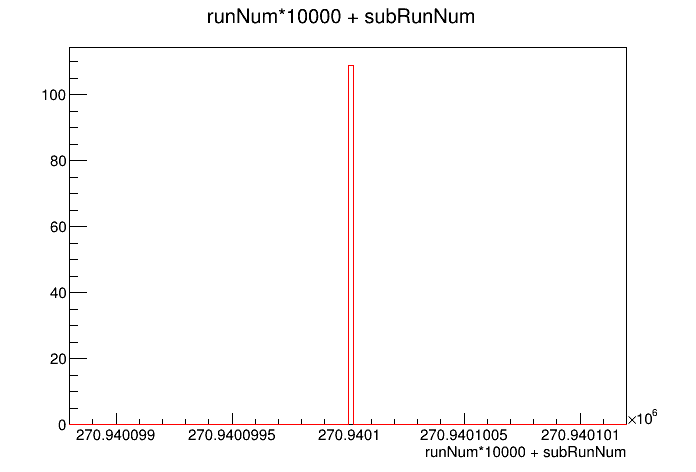

In [107]:
c = r.TCanvas()
t2.Draw("runNum*10000 + subRunNum","","")
t3.Draw("runNum*10000 + subRunNum","","same")

print(t2.GetV1()[0], t3.GetV1()[0], t2.GetV1()[0] - t3.GetV1()[0] )

c.Draw()

---

### Lets first compare all of the nearline hist tree histograms

In [108]:
hists = ['allCaloEnergies', 
         'allCaloWiggle', 
         'allCaloTimes', 
         #'gpuCTag', 
         'nearlineCTag']

folder = 'nearlineHistTree'

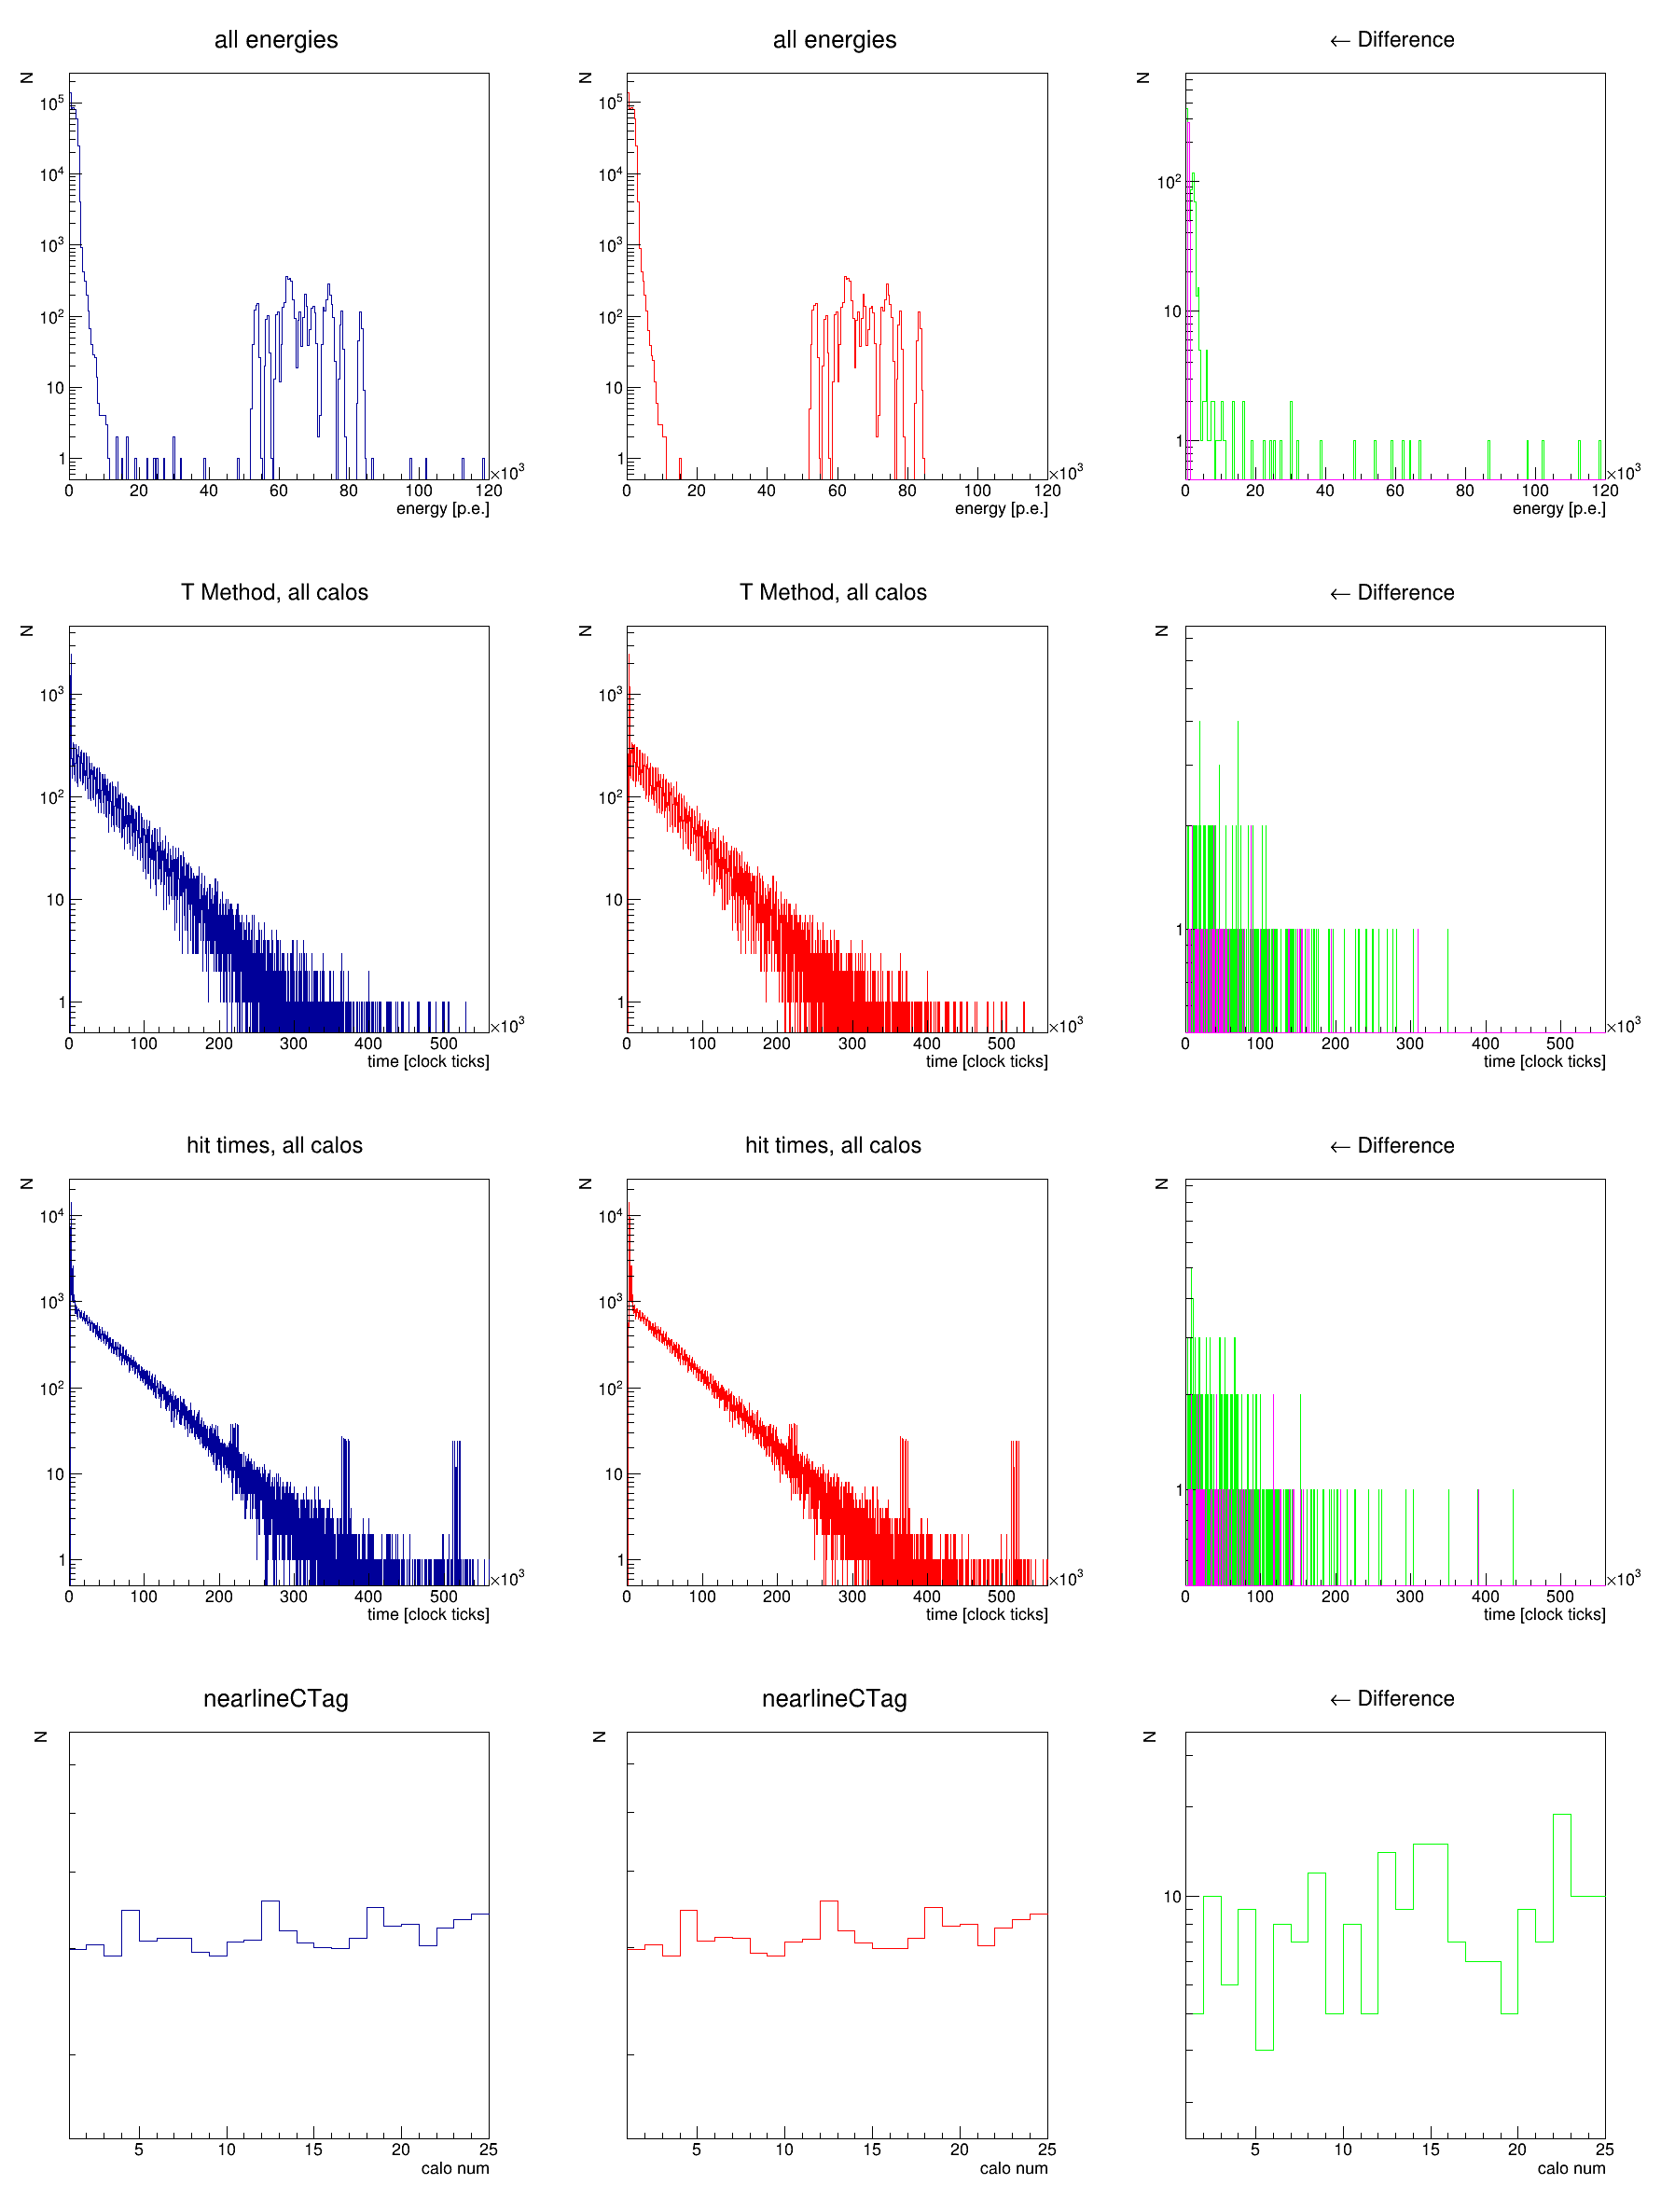

In [109]:
diffHists = []

c = r.TCanvas("c","c",1800,600*len(hists))
width = 3
c.Divide(width,len(hists))
for i, hi in enumerate(hists):
    h2 = f2.Get(folder).Get(hi)
    h3 = f3.Get(folder).Get(hi)
    h3.SetLineColor(2)
    
    hd = h2.Clone("hdiff_"+str(i))
    hd.Add(h3,-1)
    hd.SetTitle("#leftarrow Difference")
    hd.SetLineColor(3)
    hdInv = InvertTH1(hd, None, 6, 0).Clone("hD_Inv_"+str(i))
    
    diffHists.append((hd, hdInv))
    
    c.cd(i*width+1)
    h2.Draw()
    r.gPad.SetLogy()
    
    c.cd(i*width+2)
    h3.Draw()
    r.gPad.SetLogy()

    c.cd(i*width + 3)
    hd.Draw()
    hdInv.Draw("SAME")

    r.gPad.SetLogy()

    
c.Draw()
    

---

### And now for the Tree level comparison

<ROOT.TH1D object ("h2") at 0x7fffeaa08e60> <ROOT.TH1D object ("h3") at 0x7f930d212630>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


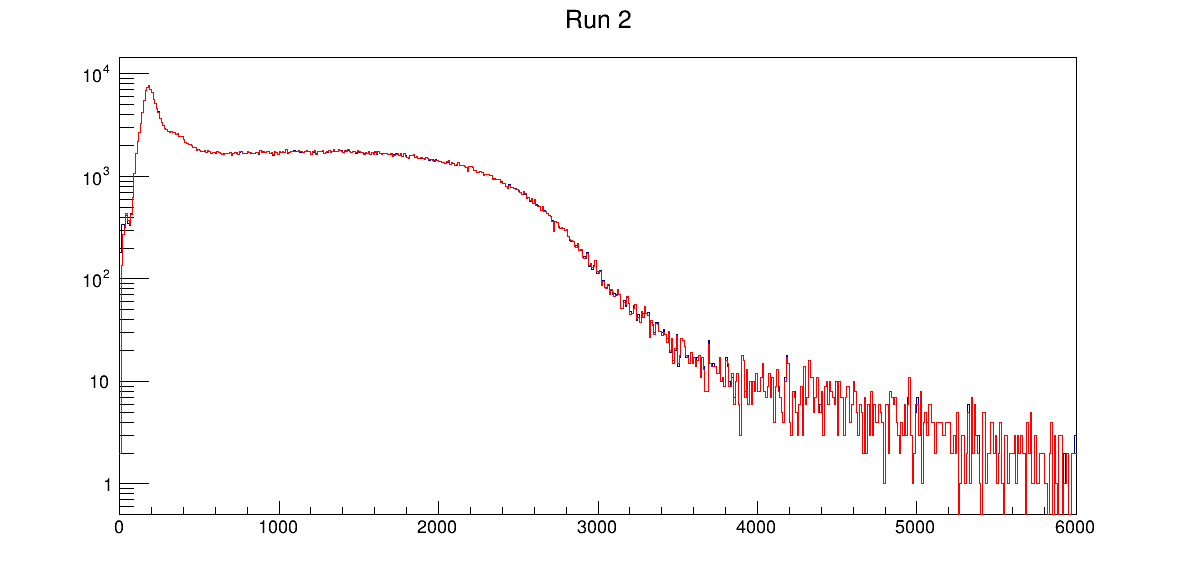

In [110]:
h2 = r.TH1D("h2","Run 2",600,0,6000)
h3 = r.TH1D("h3","Run 3",600,0,6000)
#h3 = h2.Clone("h3")
print(h2,h3)
h3.SetTitle("Run 3")
h3.SetLineColor(2)

draw1 = "energy"
draw2 = ""
draw3 = ""


t2.Draw(draw1+">>h2",draw2,"goff")
t3.Draw(draw1+">>h3",draw2,"goff")

c = r.TCanvas("c","c",1200,600)
h2.Draw("")
h3.Draw("same")
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


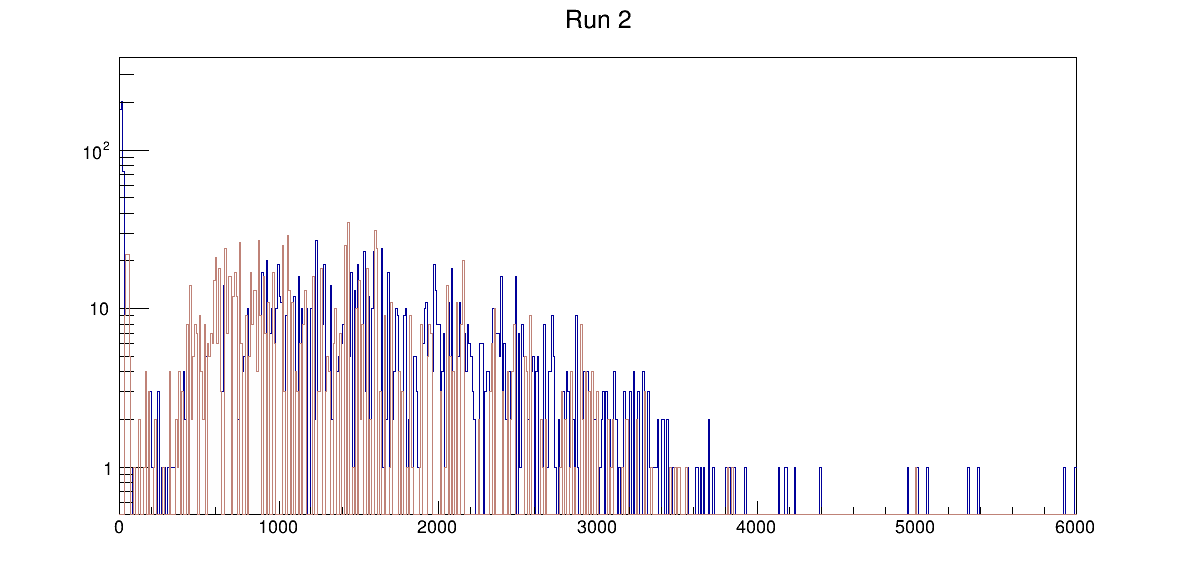

In [111]:
hd = h2.Clone("hdiff")
hd.Add(h3,-1)

hdInv = InvertTH1( hd,"", 45, 0 ).Clone("hDinv")

c = r.TCanvas("c","c",1200,600)
hd.Draw("")
hdInv.Draw("SAME")

c.SetLogy()
c.Draw()

<ROOT.TH1D object ("h2") at 0x7fffec13a7e0> <ROOT.TH1D object ("h3") at 0x7fffeaa08e60>


Warning in <TDirectoryFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


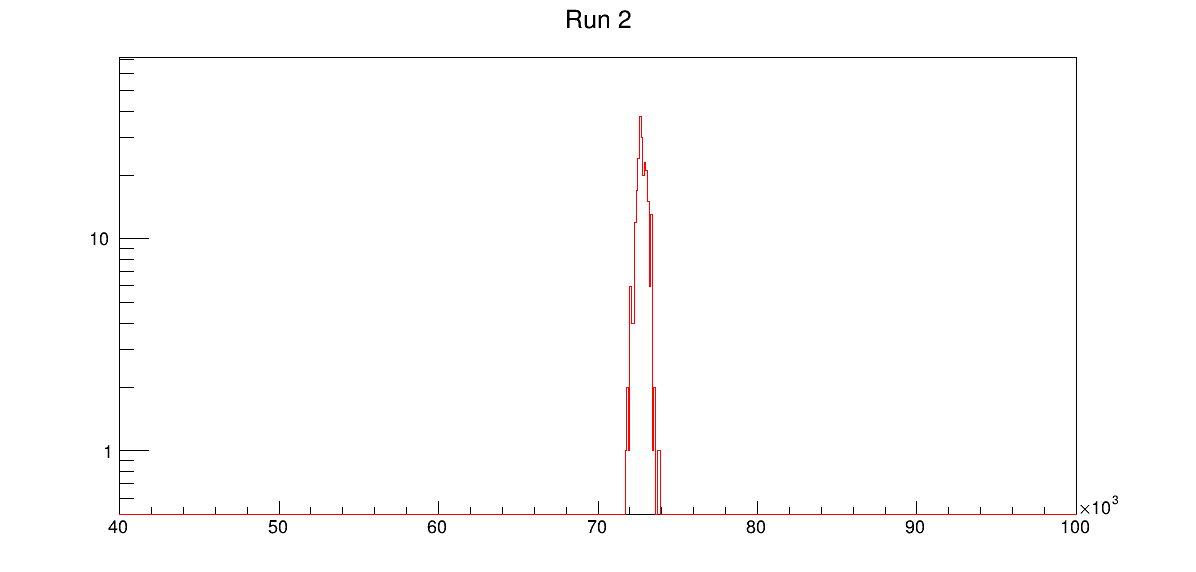

In [112]:
h2 = r.TH1D("h2","Run 2",600,40000,100000)
h3 = r.TH1D("h3","Run 3",600,40000,100000)
#h3 = h2.Clone("h3")
print(h2,h3)
h3.SetTitle("Run 3")
h3.SetLineColor(2)

draw1 = "energy"
draw2 = "caloNum == 1"
draw3 = ""


t2.Draw(draw1+">>h2",draw2,"goff")
t3.Draw(draw1+">>h3",draw2,"goff")

c = r.TCanvas("c","c",1200,600)
h2.Draw("")
h3.Draw("same")
c.SetLogy()
c.Draw()

---

### Comparison of triples

In [113]:
t2 = f2.Get("CoincidenceFinderLM").Get("CoincLM")
t3 = f3.Get("CoincidenceFinderLM").Get("CoincLM")
t3.SetLineColor(2)
t2.Print()

******************************************************************************
*Tree    :CoincLM   : CoincLM                                                *
*Entries :   485446 : Total =        76431399 bytes  File  Size =   21399129 *
*        :          : Tree compression factor =   3.57                       *
******************************************************************************
*Br    0 :coincidenceLevel : coincidenceLevel/i                              *
*Entries :   485446 : Total  Size=    1948599 bytes  File Size  =      18798 *
*Baskets :       61 : Basket Size=      32000 bytes  Compression= 103.58     *
*............................................................................*
*Br    1 :caloNum   : vector<int>                                            *
*Entries :   485446 : Total  Size=    8810313 bytes  File Size  =     886887 *
*Baskets :      336 : Basket Size=      32000 bytes  Compression=   9.93     *
*...................................................

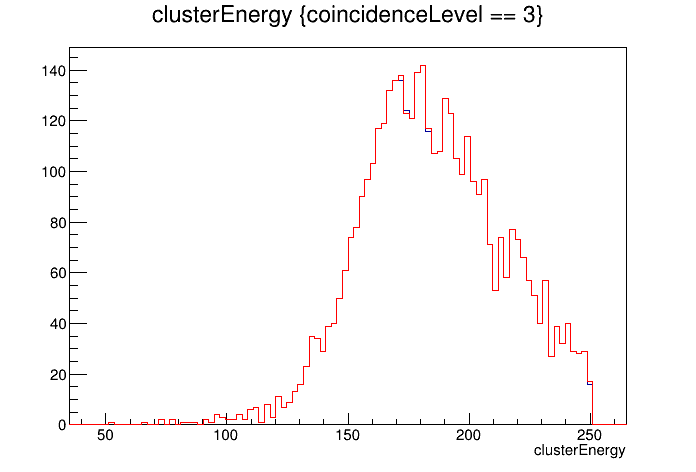

In [114]:
c = r.TCanvas()
t2.Draw("clusterEnergy","coincidenceLevel == 3","")
t3.Draw("clusterEnergy","coincidenceLevel == 3","same")
c.Draw()

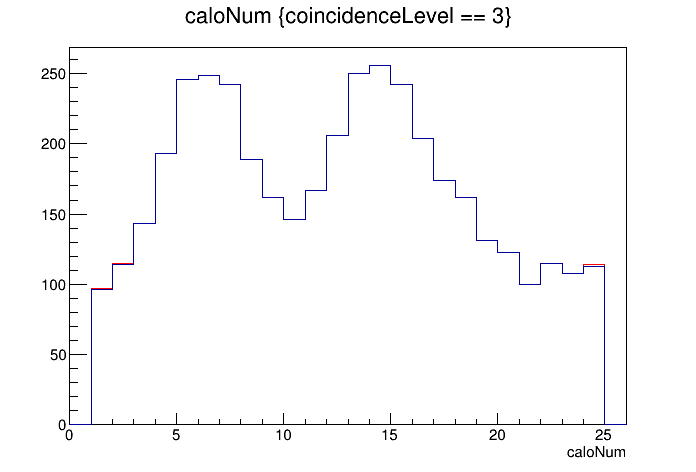

In [115]:
c = r.TCanvas()
t3.Draw("caloNum","coincidenceLevel == 3","")
t2.Draw("caloNum","coincidenceLevel == 3","same")
c.Draw()